## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0 -0.683797  0.605088  0.651978  1.217753 -0.882631  0.351135
1 -0.307655  1.466496  0.604630  0.304951 -1.417322  0.292075
2 -0.858102  1.237492  0.773130 -0.101585  1.736604  0.453571
3 -0.153885 -1.895204 -1.784496 -0.007548  1.312928 -0.064803
4  0.941334  1.352263 -0.501214  0.763396 -0.690135  0.426322


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9690436	total: 69.5ms	remaining: 1m 9s
1:	learn: 0.9594468	total: 70.1ms	remaining: 35s
2:	learn: 0.9491221	total: 70.7ms	remaining: 23.5s
3:	learn: 0.9383583	total: 71.4ms	remaining: 17.8s
4:	learn: 0.9300373	total: 71.9ms	remaining: 14.3s
5:	learn: 0.9189678	total: 72.4ms	remaining: 12s
6:	learn: 0.9085113	total: 73ms	remaining: 10.4s
7:	learn: 0.8978873	total: 73.5ms	remaining: 9.12s
8:	learn: 0.8887898	total: 74ms	remaining: 8.14s
9:	learn: 0.8802757	total: 74.4ms	remaining: 7.37s
10:	learn: 0.8694315	total: 75ms	remaining: 6.74s
11:	learn: 0.8602286	total: 75.5ms	remaining: 6.22s
12:	learn: 0.8502582	total: 76.1ms	remaining: 5.78s
13:	learn: 0.8416688	total: 76.7ms	remaining: 5.4s
14:	learn: 0.8351216	total: 77.2ms	remaining: 5.07s
15:	learn: 0.8265367	total: 77.7ms	remaining: 4.78s
16:	learn: 0.8178625	total: 78.1ms	remaining: 4.52s
17:	learn: 0.8095285	total: 78.6ms	remaining: 4.29s
18:	learn: 0.8020450	total: 79.2ms	remaining: 4.09s
19:

81:	learn: 0.4409447	total: 109ms	remaining: 1.22s
82:	learn: 0.4367413	total: 109ms	remaining: 1.21s
83:	learn: 0.4333824	total: 110ms	remaining: 1.2s
84:	learn: 0.4299995	total: 110ms	remaining: 1.19s
85:	learn: 0.4272170	total: 111ms	remaining: 1.18s
86:	learn: 0.4229533	total: 111ms	remaining: 1.17s
87:	learn: 0.4193421	total: 112ms	remaining: 1.16s
88:	learn: 0.4161406	total: 112ms	remaining: 1.15s
89:	learn: 0.4124906	total: 112ms	remaining: 1.14s
90:	learn: 0.4081379	total: 113ms	remaining: 1.13s
91:	learn: 0.4043430	total: 114ms	remaining: 1.12s
92:	learn: 0.4008098	total: 114ms	remaining: 1.11s
93:	learn: 0.3970964	total: 115ms	remaining: 1.1s
94:	learn: 0.3930881	total: 115ms	remaining: 1.1s
95:	learn: 0.3900924	total: 116ms	remaining: 1.09s
96:	learn: 0.3870484	total: 116ms	remaining: 1.08s
97:	learn: 0.3839405	total: 116ms	remaining: 1.07s
98:	learn: 0.3808202	total: 117ms	remaining: 1.06s
99:	learn: 0.3774751	total: 117ms	remaining: 1.05s
100:	learn: 0.3742568	total: 118ms

249:	learn: 0.1188379	total: 188ms	remaining: 564ms
250:	learn: 0.1179997	total: 189ms	remaining: 563ms
251:	learn: 0.1172883	total: 189ms	remaining: 561ms
252:	learn: 0.1164340	total: 190ms	remaining: 560ms
253:	learn: 0.1160349	total: 190ms	remaining: 558ms
254:	learn: 0.1156140	total: 190ms	remaining: 556ms
255:	learn: 0.1148565	total: 191ms	remaining: 554ms
256:	learn: 0.1141334	total: 191ms	remaining: 553ms
257:	learn: 0.1132878	total: 192ms	remaining: 551ms
258:	learn: 0.1125397	total: 192ms	remaining: 549ms
259:	learn: 0.1118205	total: 193ms	remaining: 548ms
260:	learn: 0.1112585	total: 193ms	remaining: 546ms
261:	learn: 0.1108959	total: 193ms	remaining: 545ms
262:	learn: 0.1101320	total: 194ms	remaining: 543ms
263:	learn: 0.1096685	total: 194ms	remaining: 542ms
264:	learn: 0.1093012	total: 195ms	remaining: 540ms
265:	learn: 0.1085821	total: 195ms	remaining: 538ms
266:	learn: 0.1081500	total: 196ms	remaining: 537ms
267:	learn: 0.1077445	total: 196ms	remaining: 535ms
268:	learn: 

477:	learn: 0.0382048	total: 292ms	remaining: 319ms
478:	learn: 0.0379871	total: 293ms	remaining: 318ms
479:	learn: 0.0377735	total: 293ms	remaining: 318ms
480:	learn: 0.0375815	total: 294ms	remaining: 317ms
481:	learn: 0.0374037	total: 294ms	remaining: 316ms
482:	learn: 0.0371927	total: 295ms	remaining: 315ms
483:	learn: 0.0370083	total: 295ms	remaining: 315ms
484:	learn: 0.0368136	total: 296ms	remaining: 314ms
485:	learn: 0.0366425	total: 296ms	remaining: 313ms
486:	learn: 0.0364713	total: 297ms	remaining: 313ms
487:	learn: 0.0363043	total: 297ms	remaining: 312ms
488:	learn: 0.0361412	total: 298ms	remaining: 311ms
489:	learn: 0.0359427	total: 298ms	remaining: 311ms
490:	learn: 0.0357197	total: 299ms	remaining: 310ms
491:	learn: 0.0355250	total: 300ms	remaining: 309ms
492:	learn: 0.0353399	total: 301ms	remaining: 309ms
493:	learn: 0.0351497	total: 301ms	remaining: 309ms
494:	learn: 0.0349374	total: 302ms	remaining: 308ms
495:	learn: 0.0347522	total: 302ms	remaining: 307ms
496:	learn: 

643:	learn: 0.0198159	total: 372ms	remaining: 206ms
644:	learn: 0.0196951	total: 372ms	remaining: 205ms
645:	learn: 0.0196315	total: 373ms	remaining: 204ms
646:	learn: 0.0195352	total: 373ms	remaining: 204ms
647:	learn: 0.0194271	total: 374ms	remaining: 203ms
648:	learn: 0.0193155	total: 374ms	remaining: 202ms
649:	learn: 0.0192235	total: 374ms	remaining: 202ms
650:	learn: 0.0191442	total: 375ms	remaining: 201ms
651:	learn: 0.0190359	total: 375ms	remaining: 200ms
652:	learn: 0.0189467	total: 376ms	remaining: 200ms
653:	learn: 0.0188376	total: 376ms	remaining: 199ms
654:	learn: 0.0187326	total: 377ms	remaining: 198ms
655:	learn: 0.0186462	total: 377ms	remaining: 198ms
656:	learn: 0.0185438	total: 378ms	remaining: 197ms
657:	learn: 0.0184346	total: 378ms	remaining: 197ms
658:	learn: 0.0183580	total: 379ms	remaining: 196ms
659:	learn: 0.0182727	total: 379ms	remaining: 195ms
660:	learn: 0.0181868	total: 379ms	remaining: 195ms
661:	learn: 0.0181137	total: 380ms	remaining: 194ms
662:	learn: 

861:	learn: 0.0079473	total: 476ms	remaining: 76.2ms
862:	learn: 0.0079239	total: 477ms	remaining: 75.6ms
863:	learn: 0.0078904	total: 477ms	remaining: 75.1ms
864:	learn: 0.0078629	total: 477ms	remaining: 74.5ms
865:	learn: 0.0078497	total: 478ms	remaining: 73.9ms
866:	learn: 0.0078173	total: 478ms	remaining: 73.4ms
867:	learn: 0.0078045	total: 479ms	remaining: 72.8ms
868:	learn: 0.0077723	total: 479ms	remaining: 72.2ms
869:	learn: 0.0077599	total: 479ms	remaining: 71.6ms
870:	learn: 0.0077237	total: 480ms	remaining: 71.1ms
871:	learn: 0.0077000	total: 480ms	remaining: 70.5ms
872:	learn: 0.0076938	total: 481ms	remaining: 69.9ms
873:	learn: 0.0076821	total: 481ms	remaining: 69.3ms
874:	learn: 0.0076546	total: 481ms	remaining: 68.8ms
875:	learn: 0.0076242	total: 482ms	remaining: 68.2ms
876:	learn: 0.0076183	total: 482ms	remaining: 67.7ms
877:	learn: 0.0076126	total: 483ms	remaining: 67.1ms
878:	learn: 0.0076014	total: 483ms	remaining: 66.5ms
879:	learn: 0.0075672	total: 484ms	remaining: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

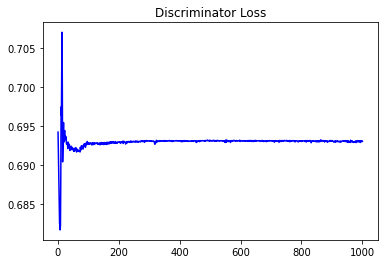

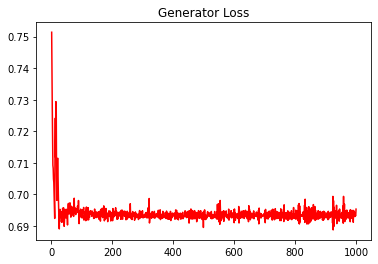

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.07064337593008113


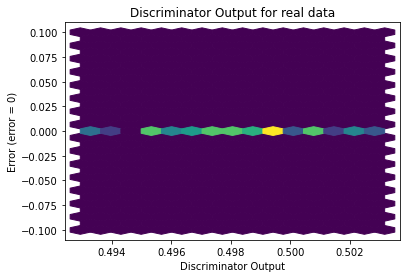

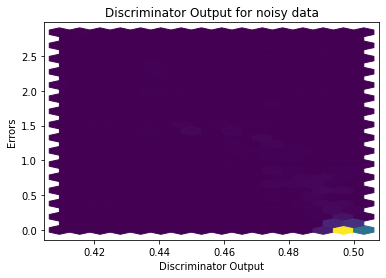

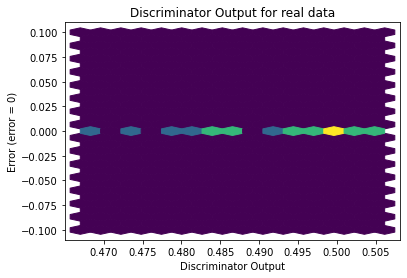

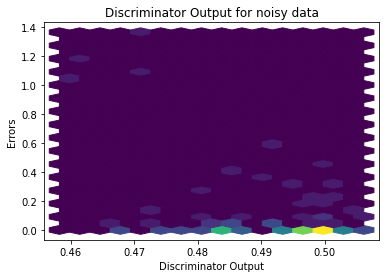

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


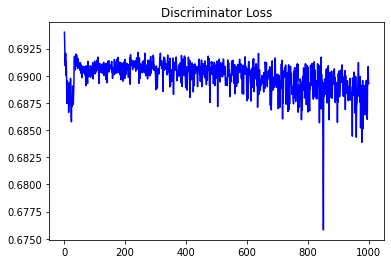

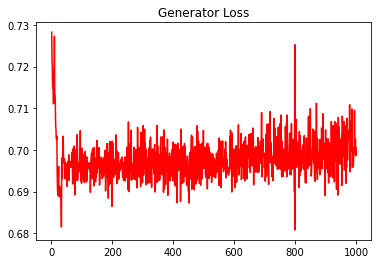

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.0630884306814747


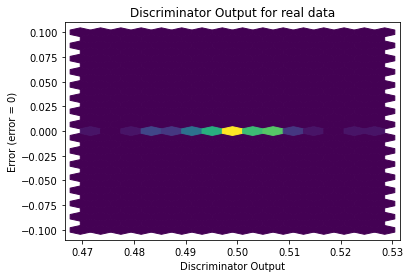

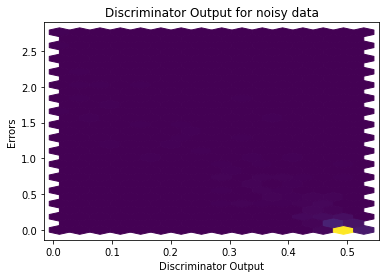

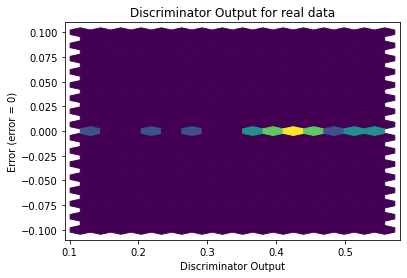

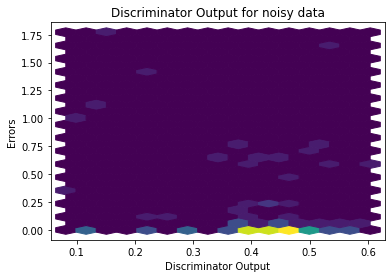

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1326]], requires_grad=True)
